# Autoencoders

In [0]:
# Required Modules

import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

%matplotlib inline

In [0]:
# Applying some transformations like normalization.

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

In [3]:
# Downloading the training and testing datasets

train = datasets.MNIST('./data', download=True, train=True, transform=transform)
test = datasets.MNIST('./data', download=True, train=False, transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
# Converting the downloaded datasets into iterators

trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [5]:
# Defining the autoencoder as a class

class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(6, 16, kernel_size=3),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 6, kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(6, 1, kernel_size=3),
            nn.ReLU(True)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        
        return x
    
model = autoencoder()
print(model)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 1, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)


In [0]:
# Defining optimizer and loss function

optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

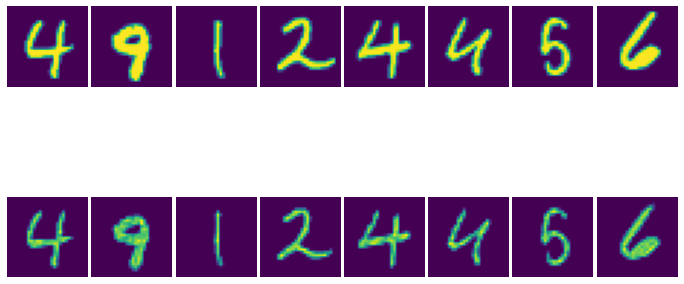

Epochs 1/10 Training loss: 0.849259.. Testing loss: 0.834286


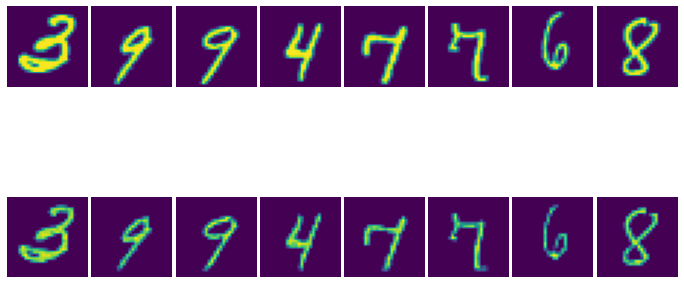

Epochs 2/10 Training loss: 0.835124.. Testing loss: 0.832923


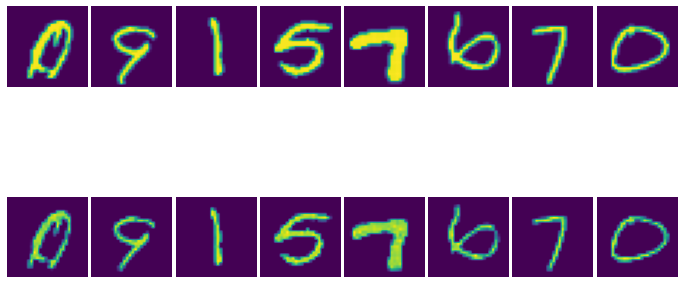

Epochs 3/10 Training loss: 0.834327.. Testing loss: 0.833272


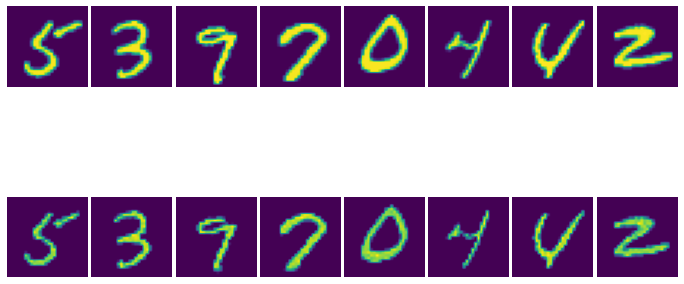

Epochs 4/10 Training loss: 0.834022.. Testing loss: 0.832038


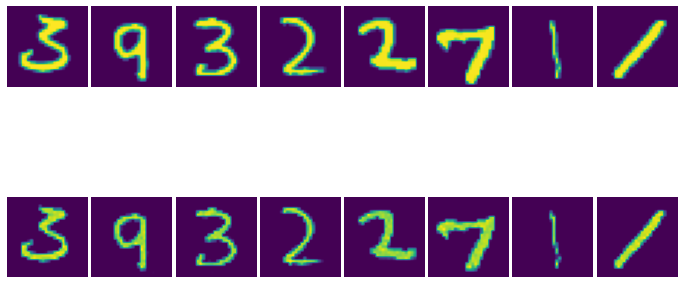

Epochs 5/10 Training loss: 0.833762.. Testing loss: 0.832035


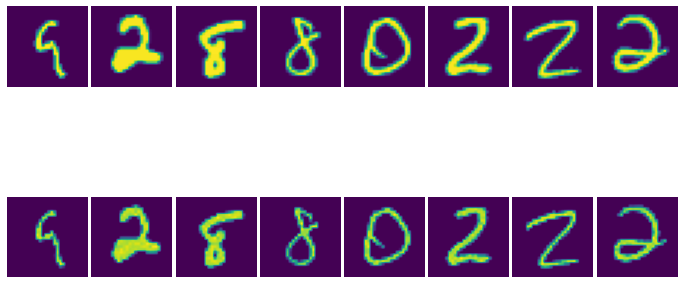

Epochs 6/10 Training loss: 0.833646.. Testing loss: 0.831882


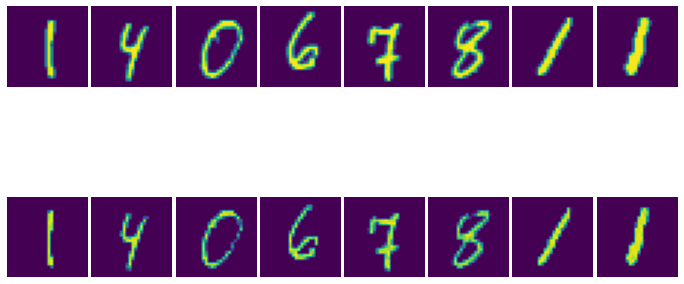

Epochs 7/10 Training loss: 0.833560.. Testing loss: 0.831892


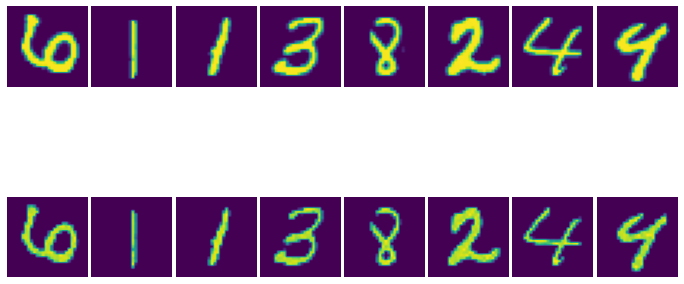

Epochs 8/10 Training loss: 0.833507.. Testing loss: 0.831681


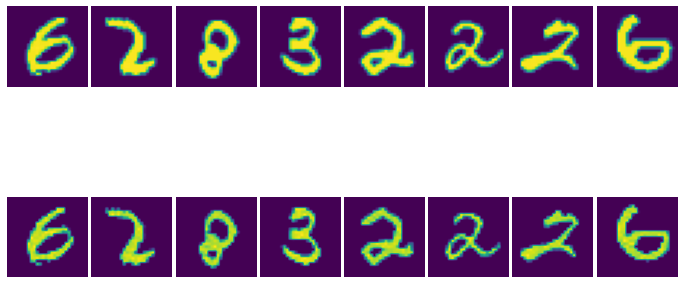

Epochs 9/10 Training loss: 0.833414.. Testing loss: 0.831641


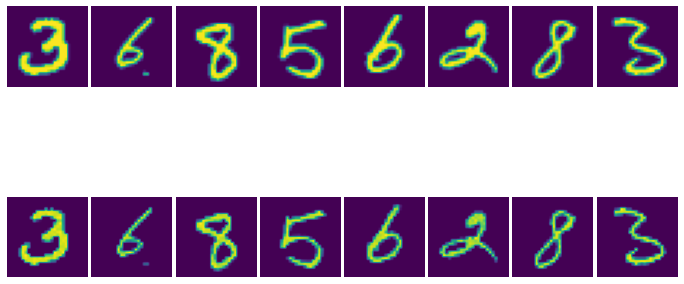

Epochs 10/10 Training loss: 0.833387.. Testing loss: 0.831897


In [7]:
epochs = 10
training_loss, testing_loss = [], []

for e in range(epochs):
    running_loss = 0
    for image, _ in trainloader:
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, image)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    fig, ax = plt.subplots(nrows=2, ncols=8, gridspec_kw = {'wspace':0.05, 'hspace':0}, figsize=(12, 7))
    for i in range(8):
        ax[0][i].imshow(image[i][0])
        ax[1][i].imshow(output[i][0].detach().numpy())
        ax[0][i].axis('off')
        ax[1][i].axis('off')
    plt.show()

    test_loss = 0
    accuracy = 0
    for image, _ in testloader:
        output = model.forward(image)
        test_loss += criterion(output, image)
    
    training_loss.append(running_loss/len(trainloader))
    testing_loss.append(test_loss/len(testloader))
    
    print("Epochs {}/{} Training loss: {:6f}.. Testing loss: {:6f}".format(e+1, epochs, training_loss[e], testing_loss[e]))

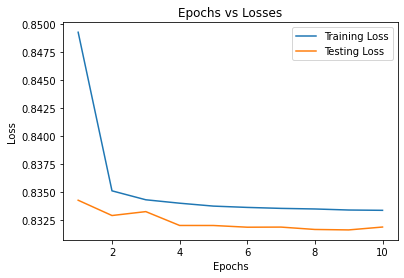

In [8]:
# Plotting Training vs Testing loss values

x_axis = range(1, epochs+1)

_, ax = plt.subplots()
ax.plot(x_axis, training_loss, label="Training Loss")
ax.plot(x_axis, testing_loss, label="Testing Loss")

ax.set_title("Epochs vs Losses")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()